## <font color='green'>Introduction to coreMicrobiome</font>

#### _<font color='black'>Dan Lin</font>_

#### _<font color='black'>2022-04</font>_

### 1. Introduction

___________________________________________________________________________________

<p align = "left">coreMicrobiome is a web-based R Shiny graphical user interface (GUI) with a R package for scientists without/with programming expertise to conduct explore and visualization of core microbial species which comprises four functional modules:</p>

(1) Initial visualization of sampling effort and distribution of dominant bacterial taxa among groups or individual samples at different taxonomic levels; 

(2) Analysis of Abundance-occupancy distribution and visualizations; 

(3) Co-occurrence network construction, analysis, comparisons and visualizations; 

(4) A combined visualization of abundance-occupancy distribution and co-occurrence network for understanding the core species from the common perspective and ecosystem perspective.

### 2. Overview of the coreMicrobiome analysis

___________________________________________________________________________________

![jupyter](img/coreMicrobiome.png)

### 3. Loading packages

___________________________________________________________________________________

Let us first load the package from github.

In [1]:
library(devtools)
devtools::install_github('lindan1128/coreMicrobiome', force = TRUE) # , force = TRUE

Loading required package: usethis





✔  checking for file ‘/private/var/folders/vj/r442f96x28340pp94hqwwr2c0000gn/T/Rtmpxw8s8u/remotesb8c658aa0b0f/lindan1128-coreMicrobiome-3e0df9d/DESCRIPTION’
─  preparing ‘coreMicrobiome’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘coreMicrobiome_1.0.tar.gz’
   


In [2]:
library(coreMicrobiome); packageVersion("coreMicrobiome")

[1] ‘1.0’

Let us then some load necessary libraries.

In [20]:
library(phyloseq); packageVersion("phyloseq")
library(microbiome); packageVersion("microbiome")
library(ggplot2); packageVersion("ggplot2")
library(gridExtra); packageVersion("gridExtra")
library(ggtree); packageVersion("ggtree")
library(ggpubr); packageVersion("ggpubr")
library(pheatmap); packageVersion("pheatmap")
library(vegan); packageVersion("vegan")
library(dplyr); packageVersion("dplyr")
library(tidyr); packageVersion("tidyr")
library(randomForest); packageVersion("randomForest")
library(caret); packageVersion("caret")
library(tidygraph); packageVersion("tidygraph")
library(igraph); packageVersion("igraph")
library(qgraph); packageVersion("qgraph")
library(ggraph); packageVersion("ggraph")
library(compositions); packageVersion("compositions")
library(reshape2); packageVersion("reshape2")
library(UpSetR); packageVersion("UpSetR")
library(propr); packageVersion("propr")

[1] ‘1.36.0’

[1] ‘1.14.0’

[1] ‘3.3.5’

[1] ‘2.3’

[1] ‘3.0.4’

[1] ‘0.4.0’

[1] ‘1.0.12’

[1] ‘2.5.7’

[1] ‘1.0.8’

[1] ‘1.2.0’

[1] ‘4.6.14’

[1] ‘6.0.89’

[1] ‘1.2.0’

[1] ‘1.3.0’

[1] ‘1.9’

[1] ‘2.0.5’

[1] ‘2.0.4’

[1] ‘1.4.4’

[1] ‘1.4.0’

[1] ‘4.3.0’

### 4. Data preparation

___________________________________________________________________________________

We show the GlobalPatterns example workflow as initially outlined in (McMurdie and Holmes 2013).

We retrieve the example data in phyloseq format.

Let us load the data.

In [4]:
data(GlobalPatterns, package = "phyloseq")
GlobalPatterns

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 19216 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 19216 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 19216 tips and 19215 internal nodes ]

We only use the archaea data to reduce the data load.

In [5]:
data = subset_taxa(GlobalPatterns, Kingdom == "Archaea")
data

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 208 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 208 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 208 tips and 207 internal nodes ]

In [6]:
otu = otu_table(data)  
sample = sample_data(data) 
tax = tax_table(data) 
tree = phy_tree(data) 

### 5. coreMicrobiome 

___________________________________________________________________________________

#### 5.1 Basic plot

We plots abundance among samples and groups (sample_group) at specific taxonomic level.

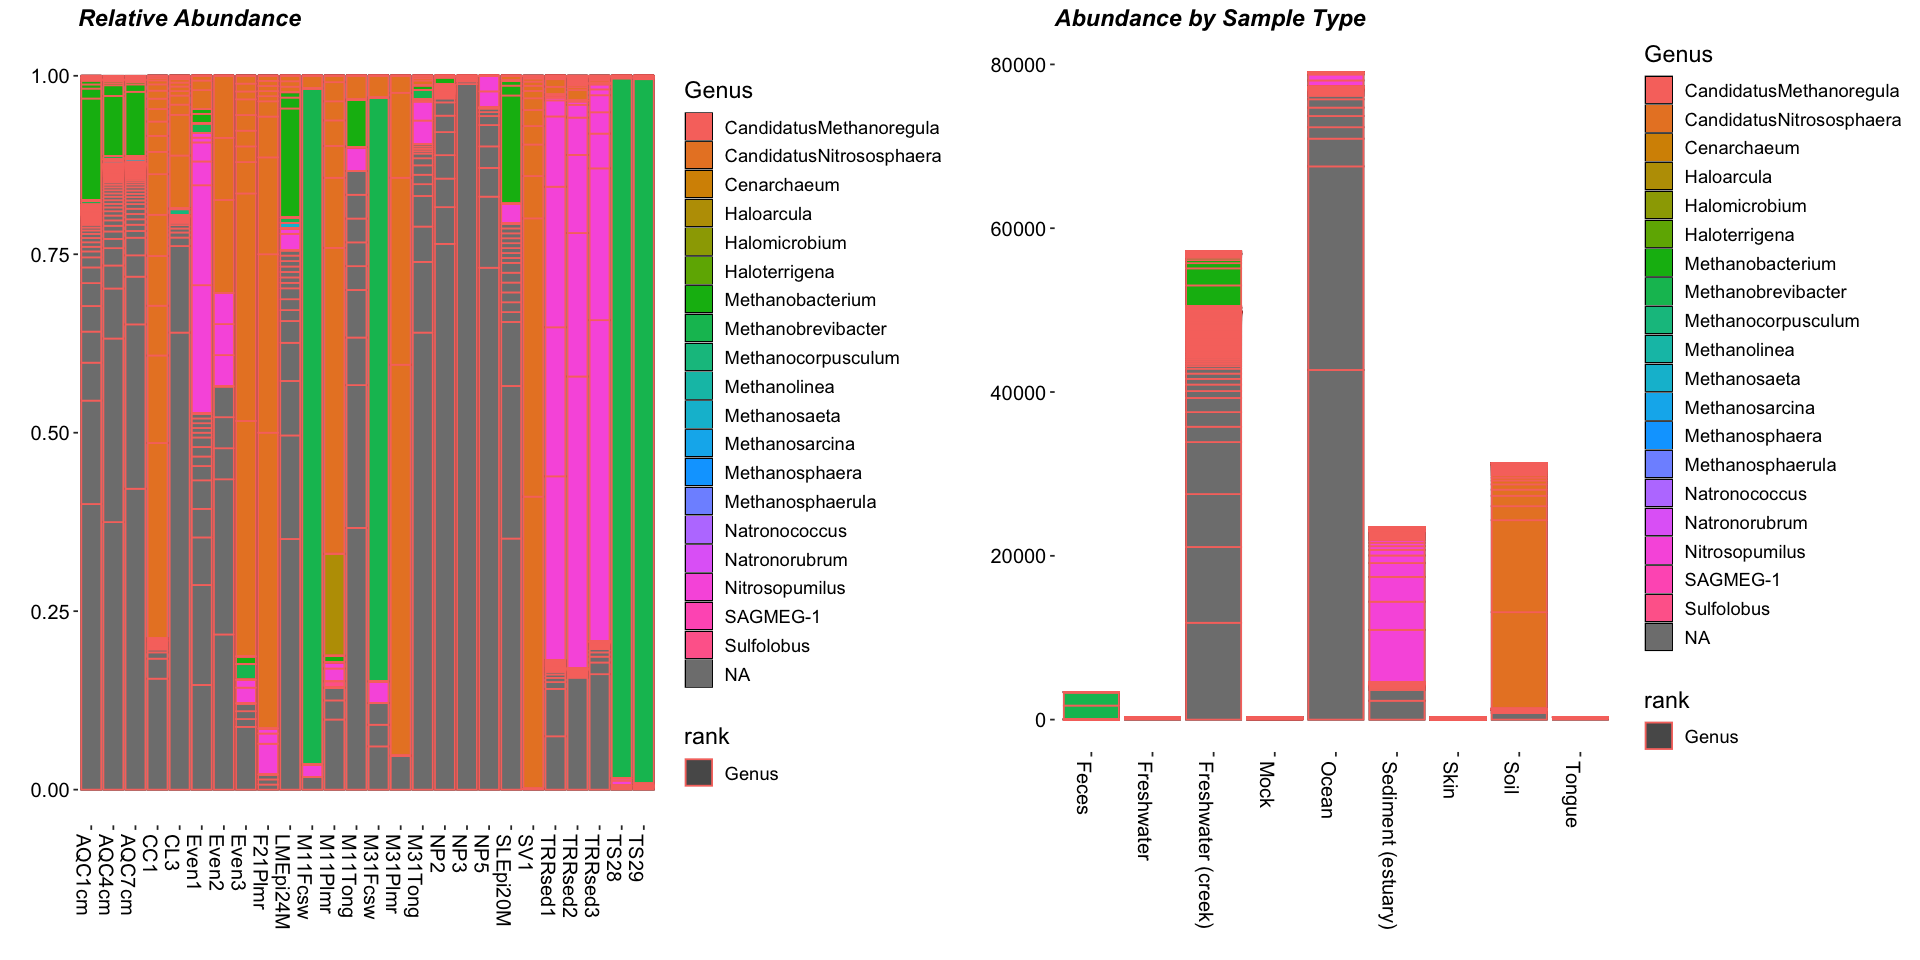

In [7]:
options(repr.plot.width = 16, repr.plot.height = 8)
abundance_plot(otu, tax, sample, sample_group = 'SampleType', rank = 'Genus')

We plots heatmap based on count data, relative abundance data, clr transformation data or log10 transformation data.

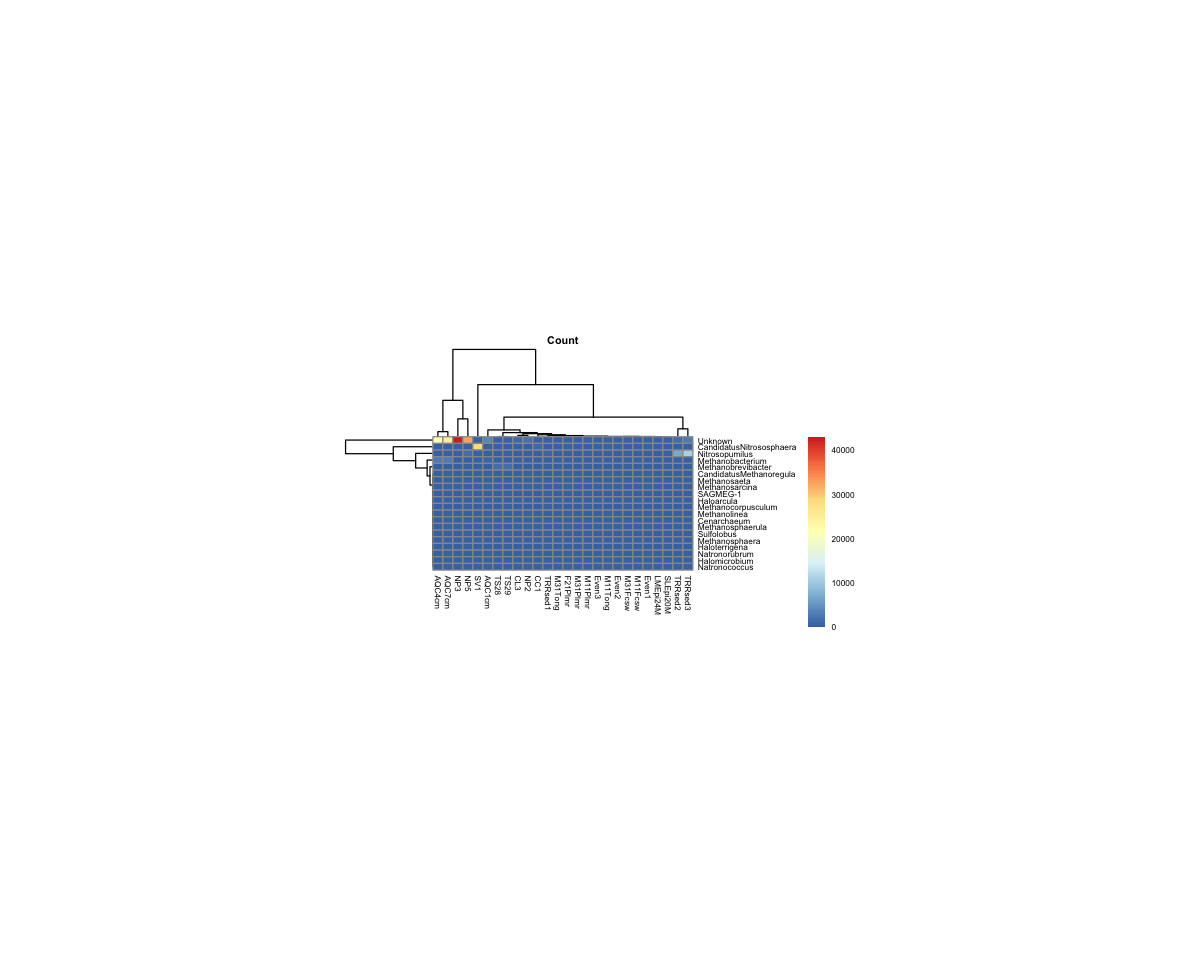

Warning message in microbiome::transform(mydata_r, "log10"):
“OTU table contains zeroes. Using log10(1 + x) transform.”


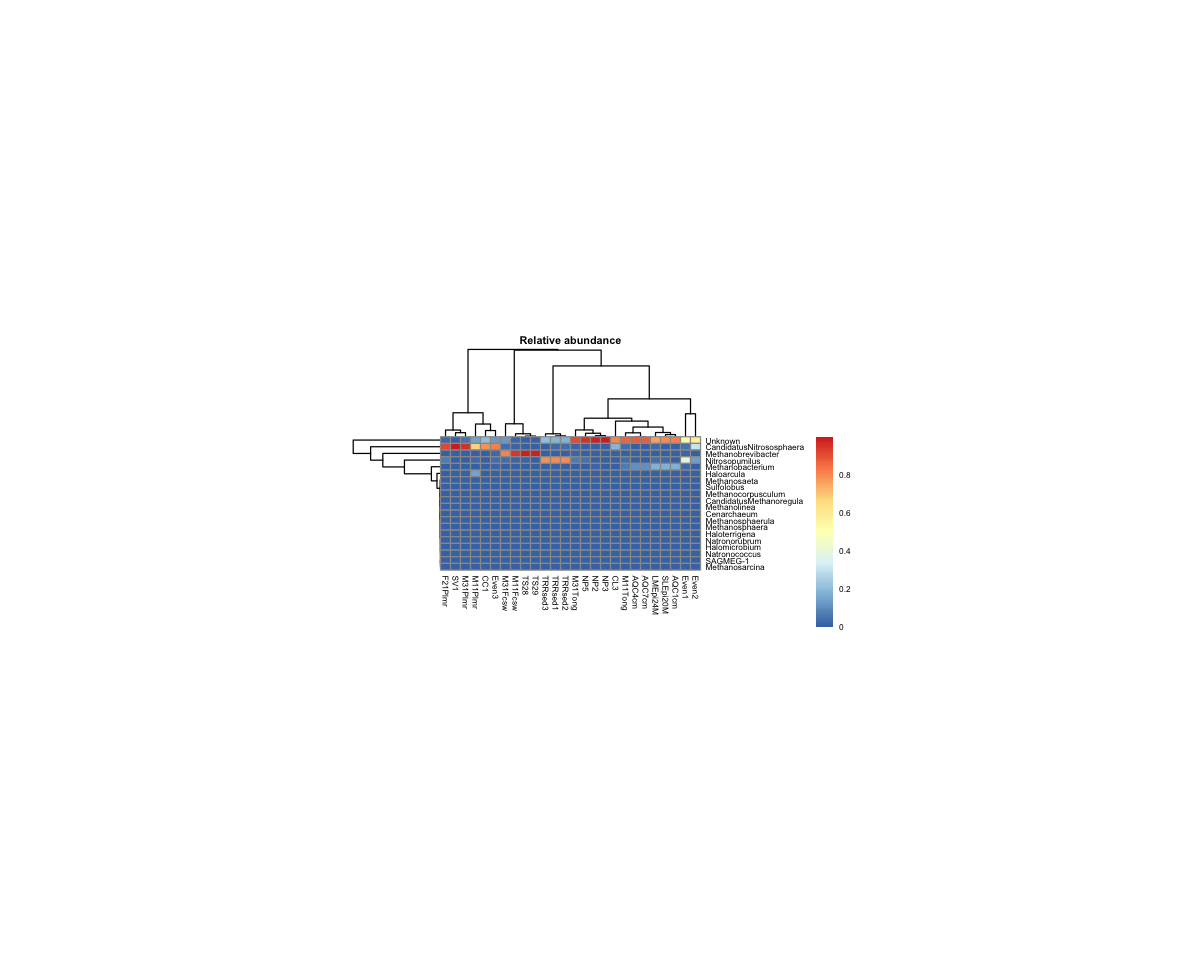

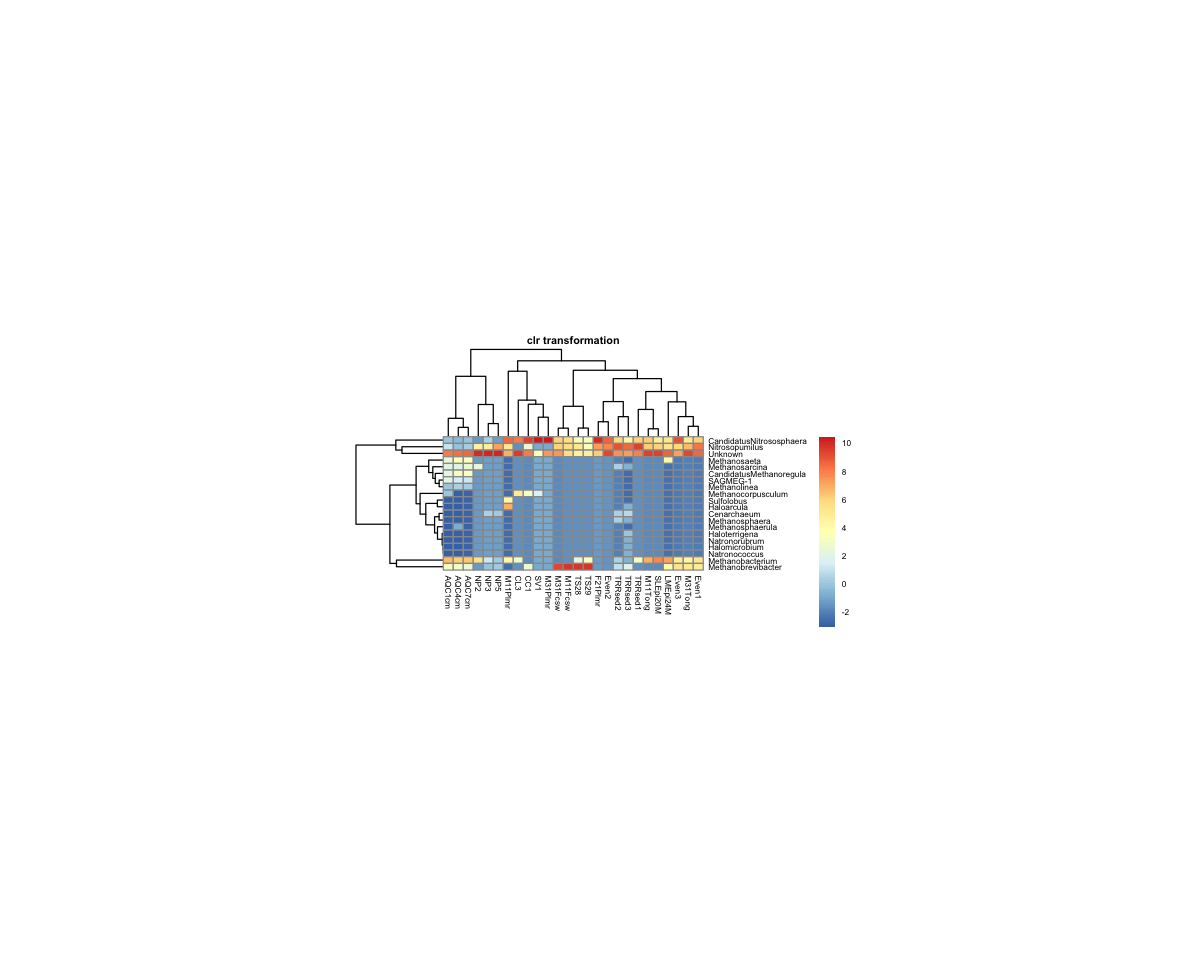

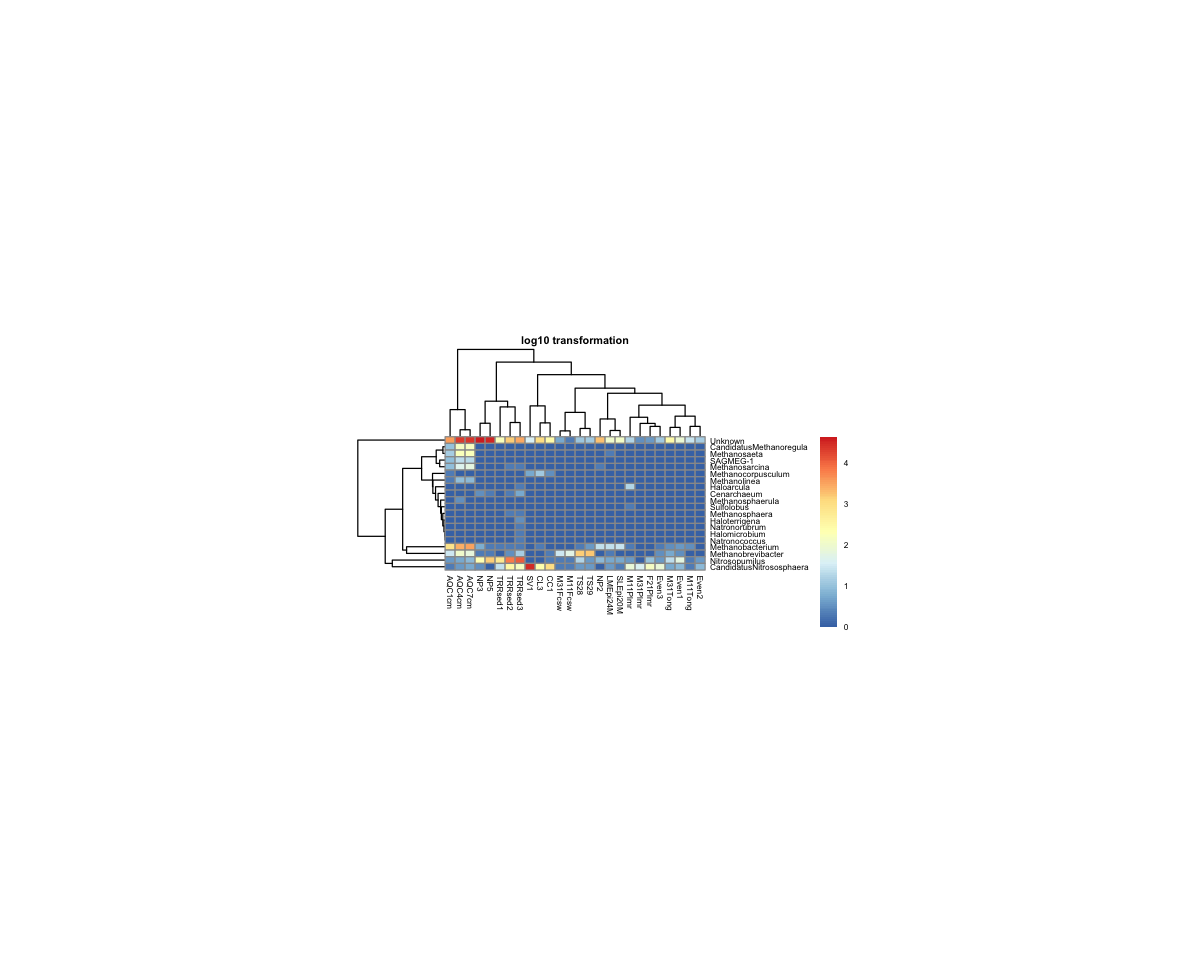

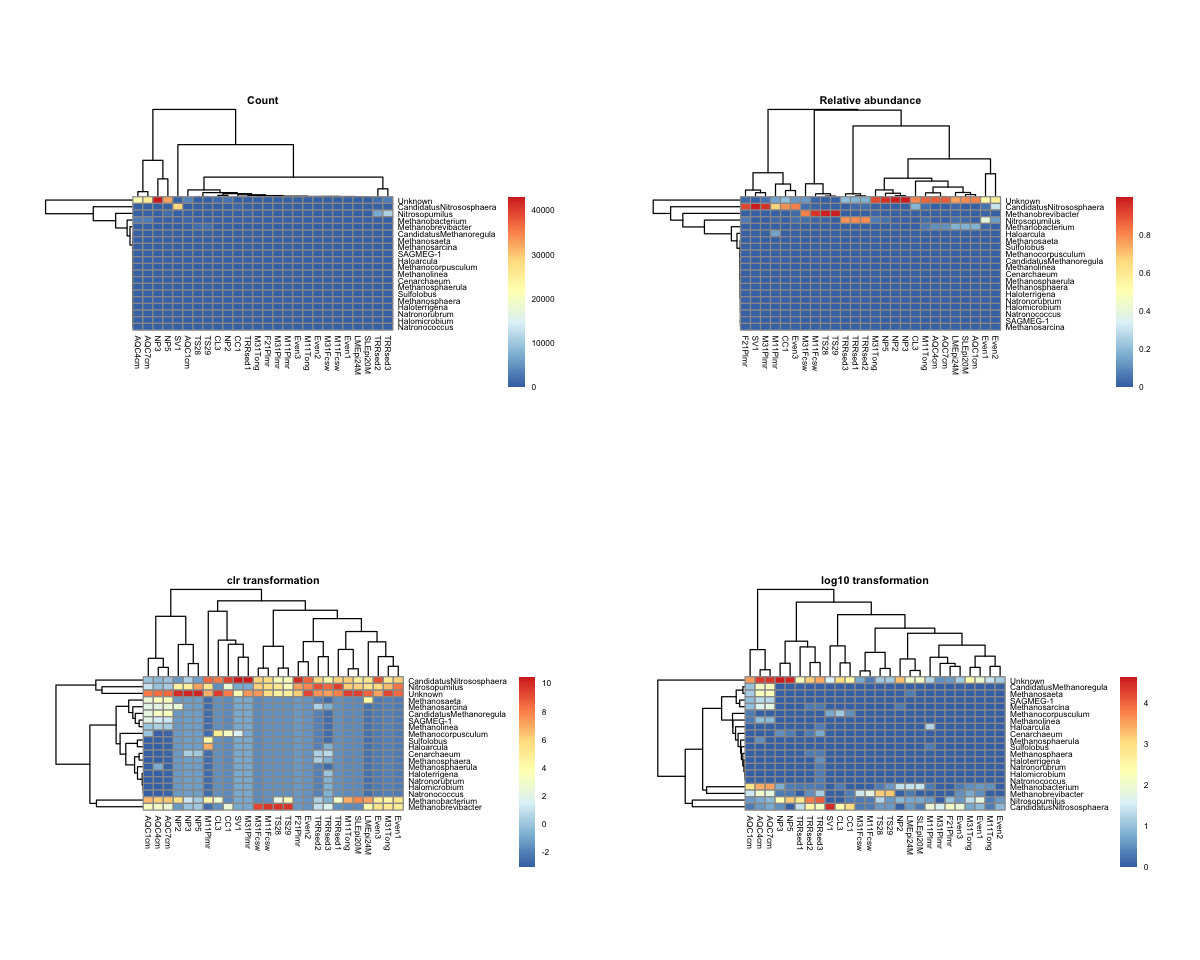

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)
heatmap_plot(otu, tax, sample, 'Genus')

We plots species accumulation curve with boxplots indicating the 95% CI.

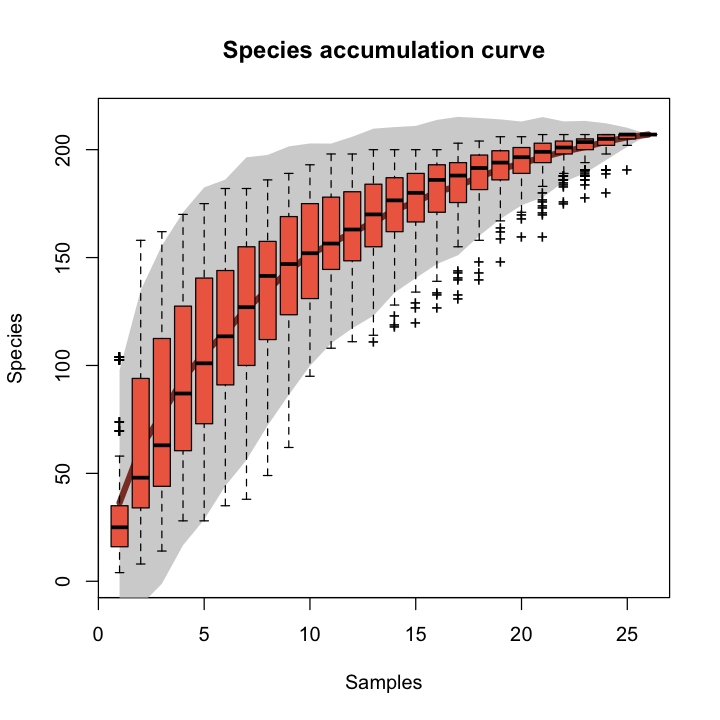

In [9]:
options(repr.plot.width = 6, repr.plot.height = 6)
species_acc_plot(otu)

#### 5.2 Abundance-occupancy analysis

We perform the abundanc-occupancy analysis as described in (Shade and Stopnisek 2019).

First, we plots BC similarity vs ranked otu.

Warning message:
“`add_rownames()` was deprecated in dplyr 1.0.0.
Please use `tibble::rownames_to_column()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



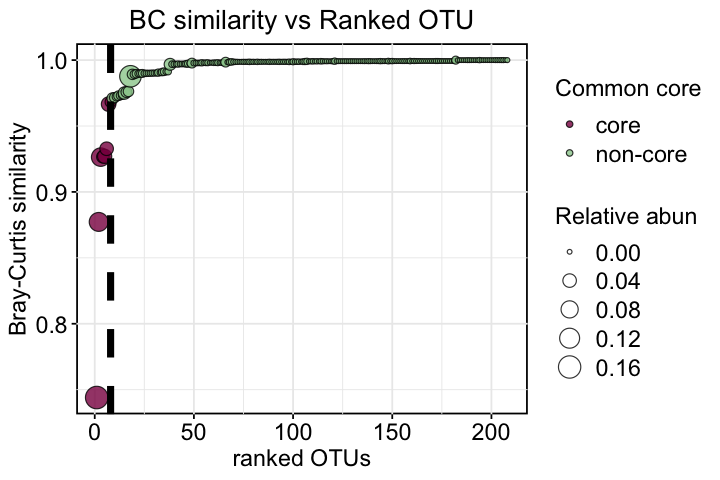

In [10]:
options(repr.plot.width = 6, repr.plot.height = 4)
bc_rank_plot(otu, sample, mini_abun = 0, threshold = 0.02, sample_name = 'X.SampleID', sample_group = 'SampleType') +
labs(title = 'BC similarity vs Ranked OTU') +
scale_fill_manual(values = c("deeppink4", "darkseagreen3")) +
theme(plot.title = element_text(size = 16, color = "black", hjust = 0.5, vjust = 1, lineheight = 0.2)) 

Then, we observe the relationship between occupancy and abundance with color denoting and core or non-core otu.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



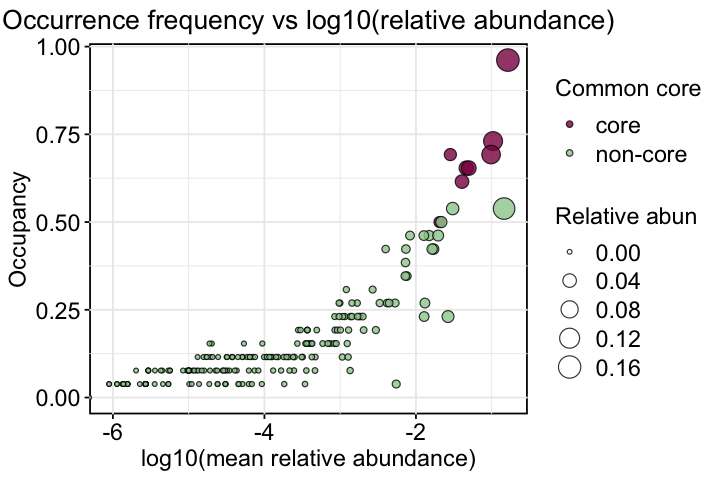

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4)
abun_occ_plot(otu, sample, mini_abun = 0, threshold = 0.02, sample_name = 'X.SampleID', sample_group = 'SampleType')+
labs(title = 'Occurrence frequency vs log10(relative abundance)') +
scale_fill_manual(values = c("deeppink4", "darkseagreen3")) +
theme(plot.title = element_text(size = 16, color = "black", hjust = 0.5, vjust = 1, lineheight = 0.2))

Then, we plot the phylogenetic tree with a heatmap denoting the average occurrence frequency of each taxa with color denoting and core or non-core otu.

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Joining, by = "otu"
Warning message:
“Setting row names on a tibble is deprecated.”


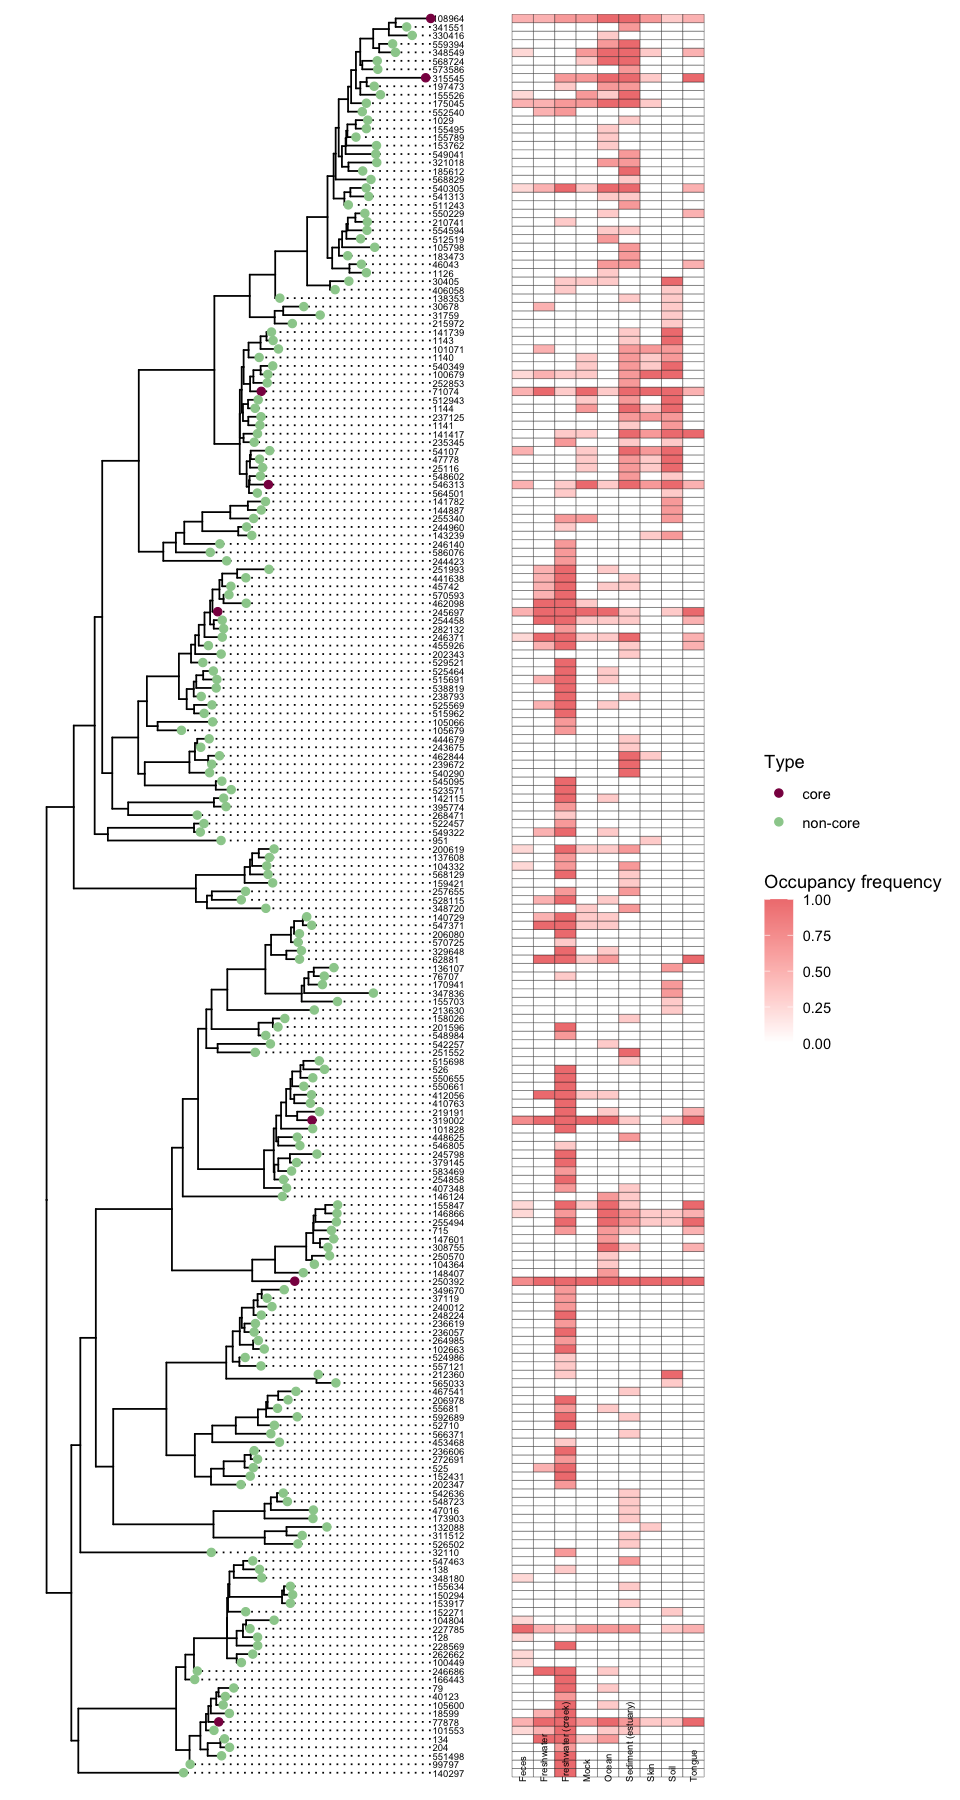

In [12]:
options(repr.plot.width = 8, repr.plot.height = 15)
tree_abun_plot(otu, sample, tree, mini_abun = 0, threshold = 0.02, sample_name = 'X.SampleID', sample_group = 'SampleType', offset = 0.1, width = 0.5, core_col = 'deeppink4', noncore_col = 'darkseagreen3', low_col = 'white', high_col = 'lightcoral', hlab = 2, ttip = 2, tlab = 2)

Then, we show the average occupancy and average relative abundance between core and non-core otu.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



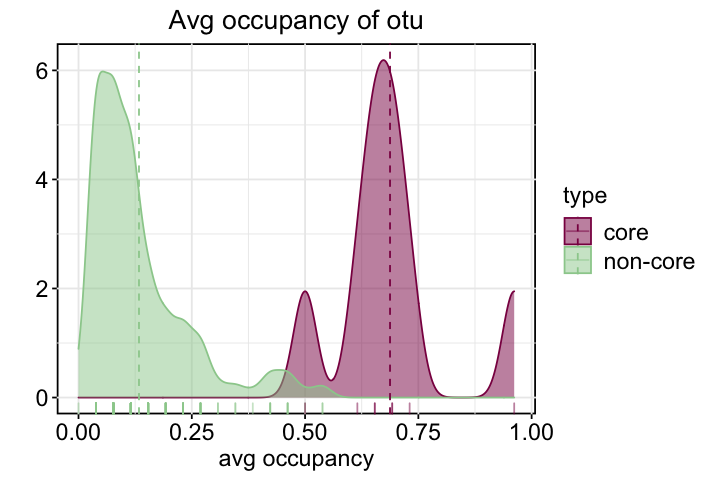

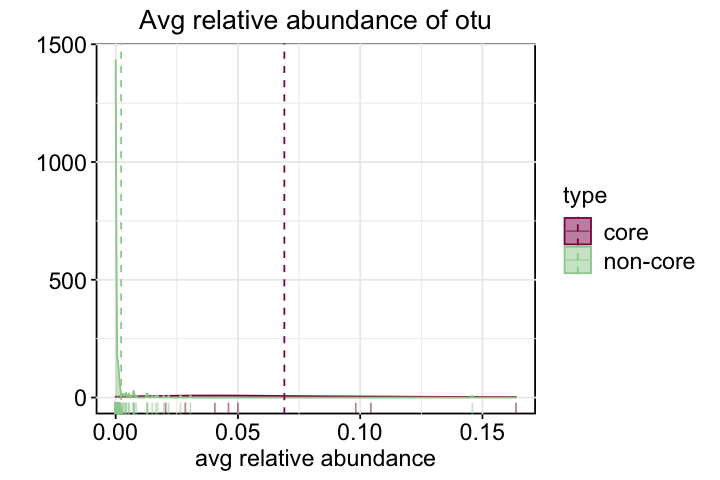

In [13]:
options(repr.plot.width = 6, repr.plot.height = 4)
p <- preve_abun_dis_plot(otu, sample, mini_abun = 0, threshold = 0.02, sample_name = 'X.SampleID', sample_group = 'SampleType', core_col = "deeppink4", noncore_col = "darkseagreen3")
p[[1]] +
scale_fill_manual(values = c("deeppink4", "darkseagreen3")) +
theme(plot.title = element_text(size = 16, color = "black", hjust = 0.5, vjust = 1, lineheight = 0.2))
p[[2]] +
scale_fill_manual(values = c("deeppink4", "darkseagreen3")) +
theme(plot.title = element_text(size = 16, color = "black", hjust = 0.5, vjust = 1, lineheight = 0.2))

Finally, we use random forest to identify the importance of otu (core otu, non-core otu and all otu) on predicting/classifying the sample_group and display the accuracy.

[1] "importance_rf"
       MeanDecreaseGini     id
250392         2.592395 250392
319002         2.542659 319002
71074          2.495226  71074
546313         1.889925 546313
315545         1.759458 315545
77878          1.641290  77878
245697         1.431425 245697
108964         1.400817 108964
[1] "accuracy"
      type train_test       acc                id
1     core      train 1.0000000    core_train_acc
2     core       test 0.4285714     core_test_acc
3 non-core      train 1.0000000 noncore_train_acc
4 non-core       test 0.5714286  noncore_test_acc
5      all      train 1.0000000     all_train_acc
6      all       test 0.5714286      all_test_acc


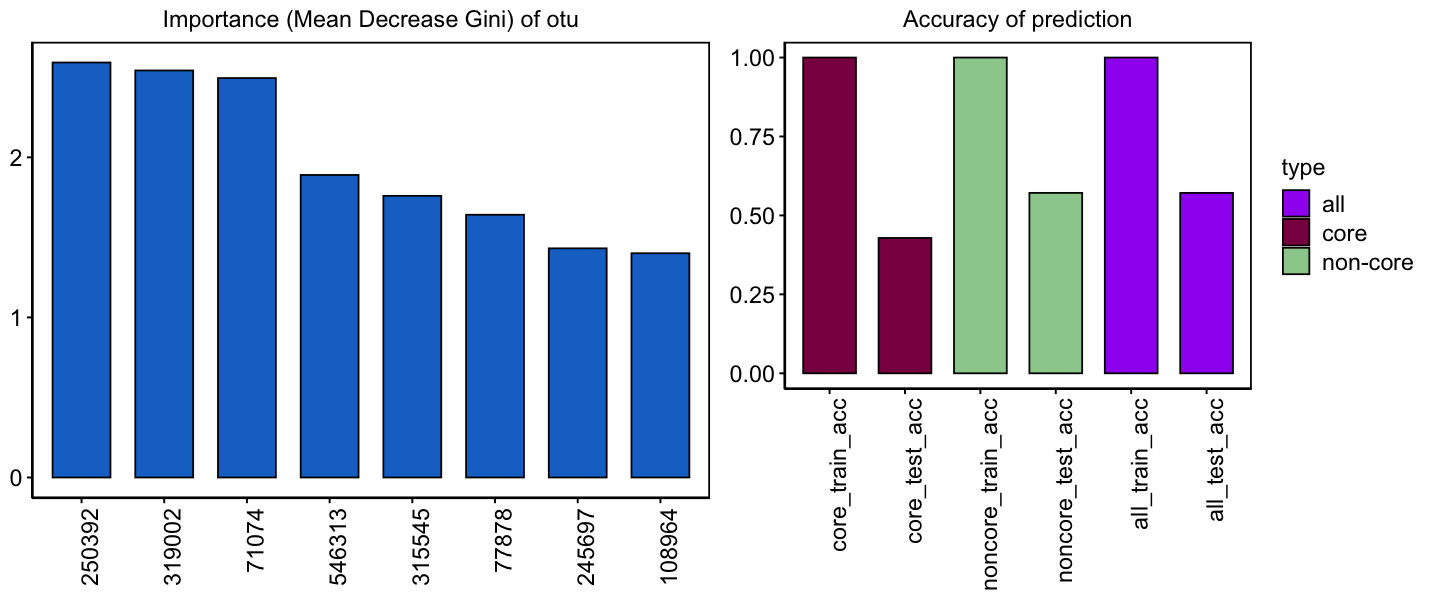

In [14]:
options(repr.plot.width = 12, repr.plot.height = 5)
random_forest_plot(otu, sample, mini_abun = 0, threshold = 0.02, sample_name = 'X.SampleID', sample_group = 'SampleType')

#### 5.3 Network analysis

We construct the co-occurrence networks with 3 optional compositional association methods on the filtered data (low occurrence frequency otu should be removed): propr, sparcc and cclasso, based on certain permutation number, FDR and association threshold.

In the example, we only construct the networks by propr and sparcc. Whey using the defined thresholds (FDR = 0.1, cor = 0.6), cclasso identifies no association.

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.

Alert: Try parallelizing updateCutoffs with ncores > 1.

Alert: Estimating FDR for largely positive proportional pairs only.



|------------(25%)----------(50%)----------(75%)----------|


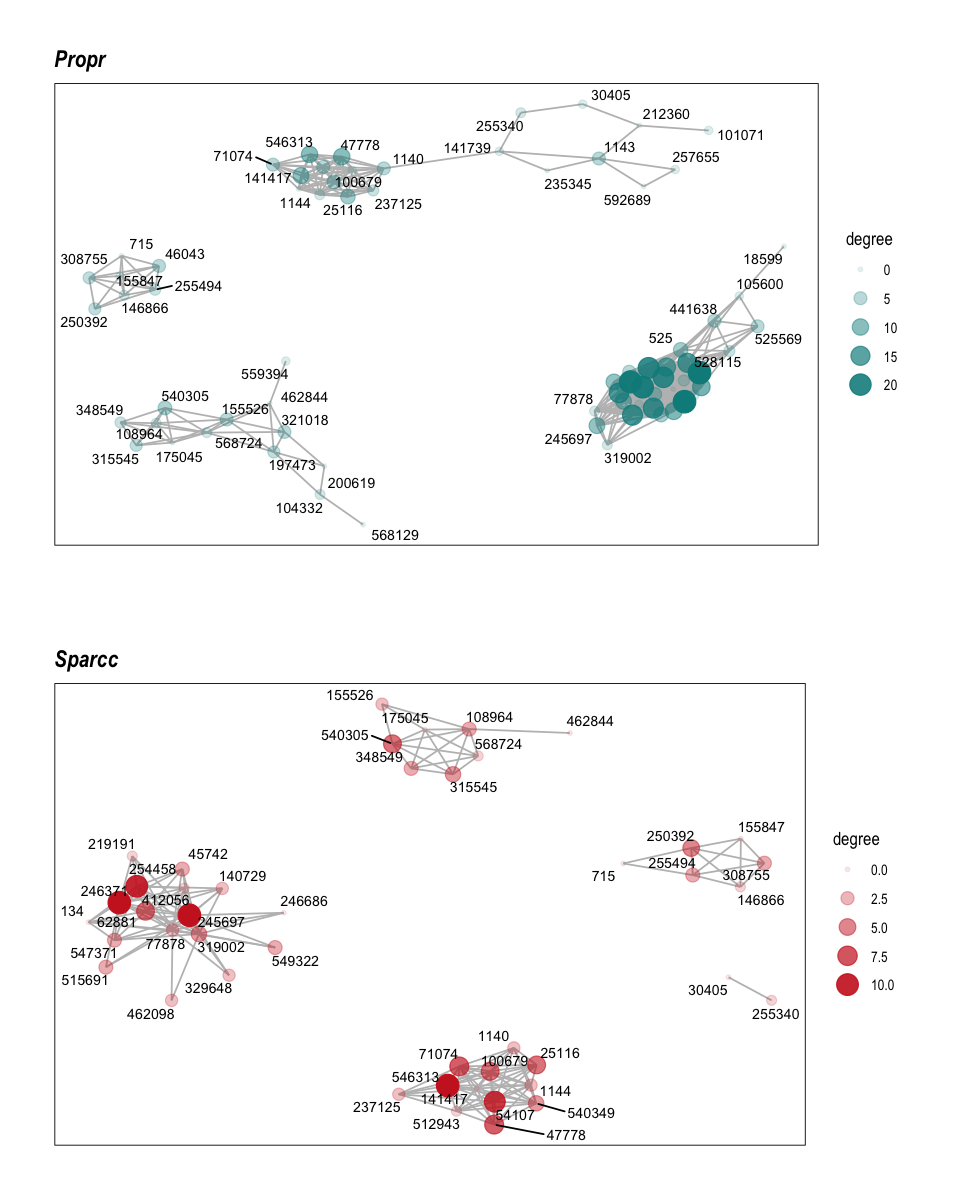

In [15]:
options(repr.plot.width = 8, repr.plot.height = 10)
networks_plot(otu, tax, sample, pre_threshold = 0.15, fdr_threshold = 0.1, cor_threshold = 0.6, permutation = 100, propr = TRUE, sparcc = TRUE, cclasso = FALSE, propr_col = 'darkcyan', sparcc_col = 'firebrick3', cclasso_col = 'goldenrod3')

Then, we calculate the node-level and network-level properties of these two networks and perform statistical testing.

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.

Alert: Try parallelizing updateCutoffs with ncores > 1.

Alert: Estimating FDR for largely positive proportional pairs only.



|------------(25%)----------(50%)----------(75%)----------|


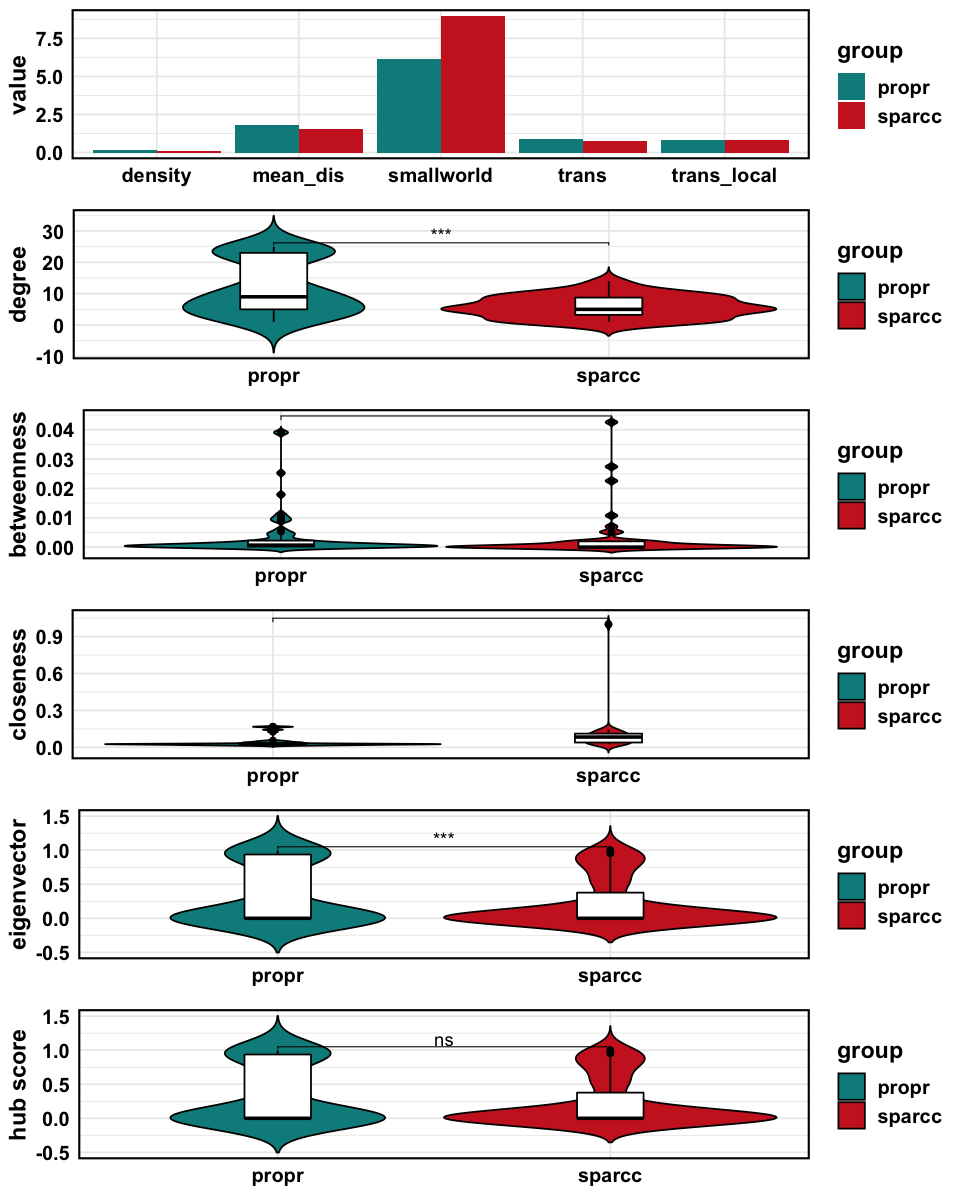

In [16]:
options(repr.plot.width = 8, repr.plot.height = 10)
networks_properties_plot(otu, tax, sample, pre_threshold = 0.15, fdr_threshold = 0.1, cor_threshold = 0.6, permutation = 100, propr = TRUE, sparcc = TRUE, cclasso = FALSE, propr_col = 'darkcyan', sparcc_col = 'firebrick3', cclasso_col = 'goldenrod3')

Finally, we compare the common/shared nodes and edges between these two networks.

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.

Alert: Try parallelizing updateCutoffs with ncores > 1.

Alert: Estimating FDR for largely positive proportional pairs only.



|------------(25%)----------(50%)----------(75%)----------|
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.003095893 !
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.0002359 !
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.002614507 !
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.001195832 !
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.002497205 !
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.001318274 !
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.0008148992 !
WARNING of cclasso_sub:
 	Maximum Iteration: 200 && Relative error: 0.00150169 !
	Optimal lambda is near boundary! ([0.8219109,1])


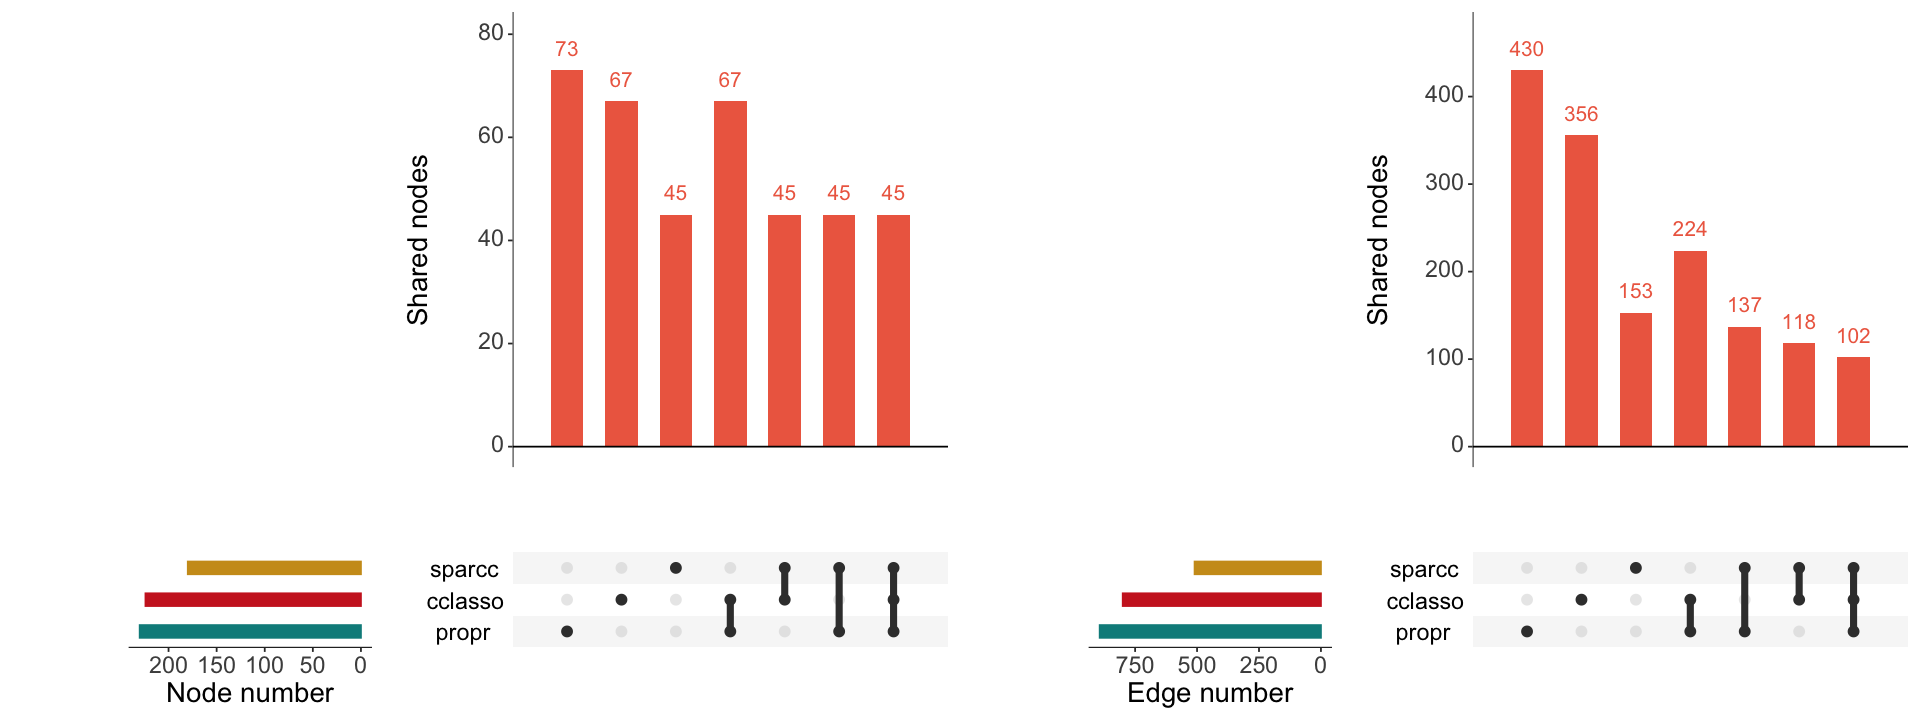

In [17]:
options(repr.plot.width = 16, repr.plot.height = 6)
networks_shared_ne_plot(otu, tax, sample, pre_threshold = 0.15, fdr_threshold = 0.1, cor_threshold = 0.6, permutation = 100, propr = TRUE, sparcc = TRUE, cclasso = TRUE, propr_col = 'darkcyan', sparcc_col = 'firebrick3', cclasso_col = 'goldenrod3')

#### 5.4 Combined plot

The function phnetworks implements a user friendly wrapper for visualization in abundance-occupancy analysis and network analysis.

1. Plot phylogenetic tree showing the evolutionary relationship of all taxa.

2. Plot heatmaps showing the average occurrence frequency and average relative abundance of each taxa among all sample groups.

3. Plot the networks constructed by 3 optional compositional association methods: propr, sparcc and cclasso, which shows the co-occurrence role of each taxa.

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Alert: Replacing 0s with next smallest value.

Alert: Saving log-ratio transformed counts to @logratio.

Alert: Fixing permutations to active random seed.

Alert: Tabulating the presence of 0 counts.

Alert: Use '[' to index proportionality matrix.

Alert: Use 'updateCutoffs' to calculate FDR.

Alert: Try parallelizing updateCutoffs with ncores > 1.

Alert: Estimating FDR for largely positive proportional pairs only.

|------------(25%)----------(50%)----------(75%)----------|


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘tidytree’

Joining, by = "otu"
Joining, by = "otu"
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'alpha' is already present. Adding another scale for 'alpha', which
will replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



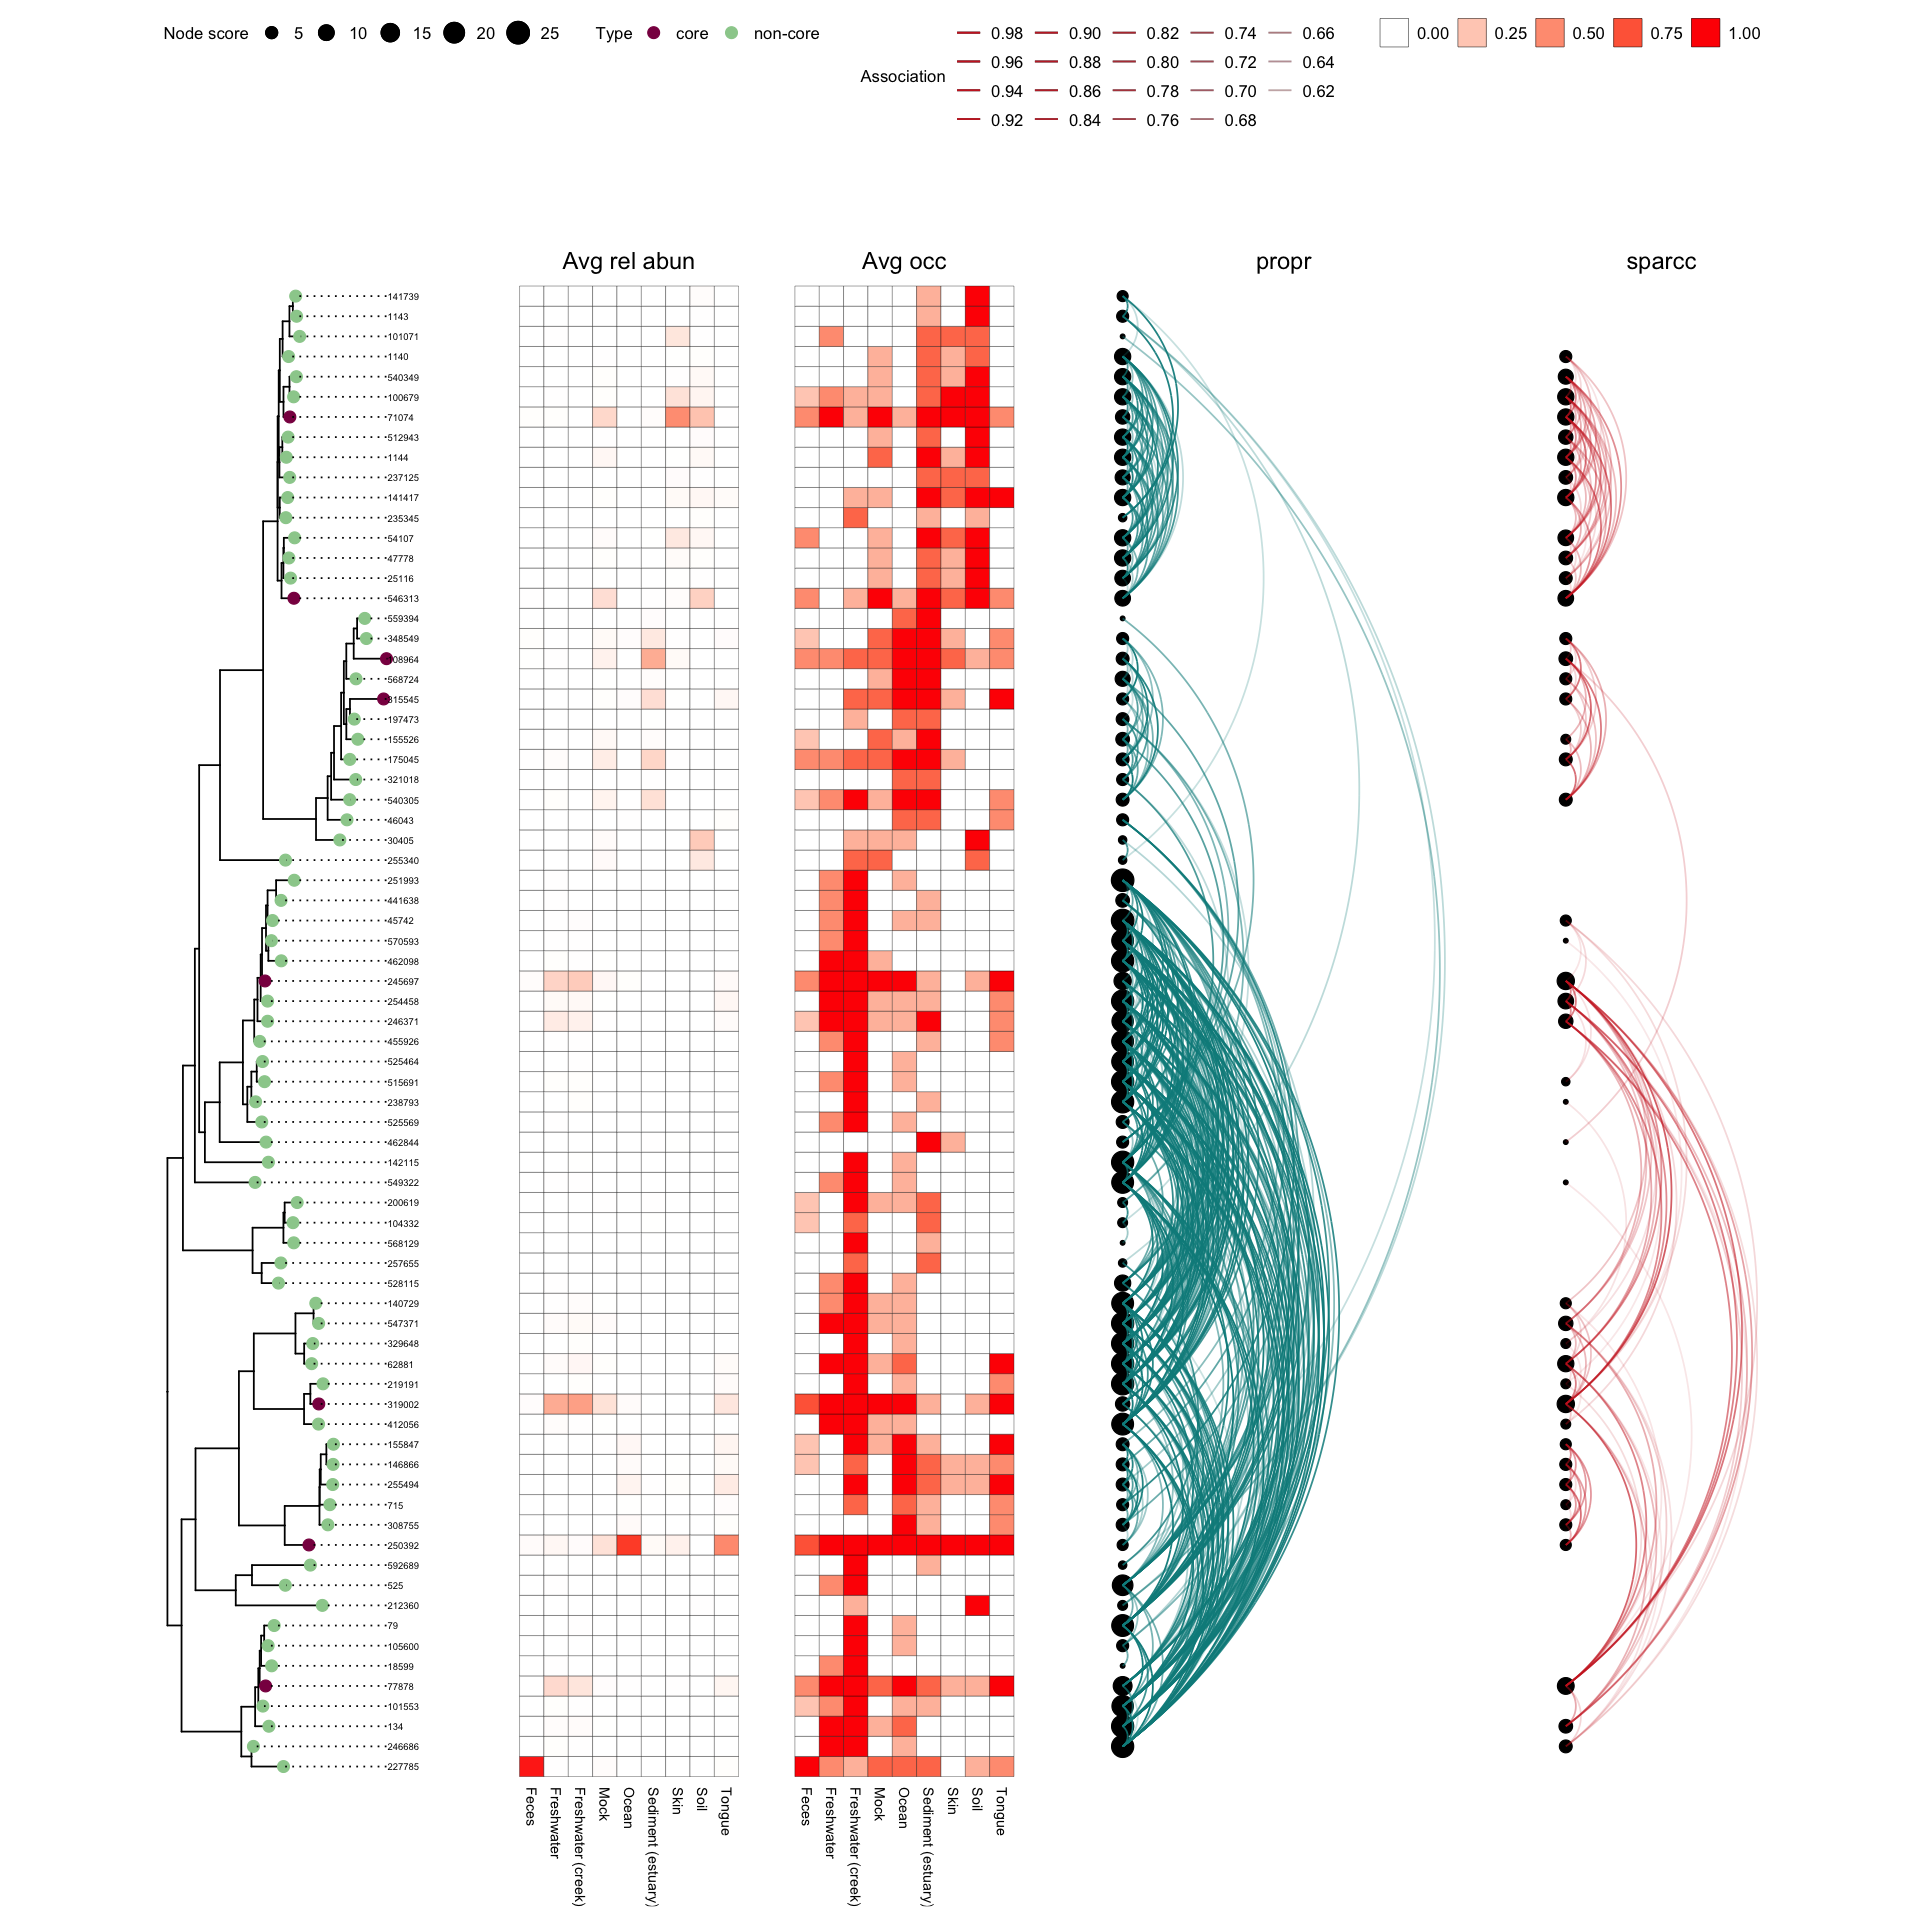

In [18]:
options(repr.plot.width = 16, repr.plot.height = 16)
phnetworks(otu, tax, sample, tree, propr = TRUE, sparcc = TRUE, cclasso = FALSE, pre_threshold=0.15, fdr_threshold=0.1, cor_threshold=0.6, permutation=10, nscore = 'degree', hcol = 'red', propr_col = 'darkcyan', sparcc_col = 'firebrick3', cclasso_col = 'goldenrod3', ttip = 3, tlab = 2, hlab = 4, alab = 5, llab = 10, offset = 0.3, width = 1, mini_abun = 0, threshold = 0.02, sample_name = 'X.SampleID', sample_group = 'SampleType')

### 6. Package versions

___________________________________________________________________________________

In [19]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] propr_4.3.0         UpSetR_1.4.0        reshape2_1.4.4     
 [4] compositions_2.0-4  ggraph_2.0.5        qgraph_1.9         
 [7] igraph_1.3.0        tidygraph_1.2.0     caret_6.0-89       
[10] randomForest_4.6-14 tidyr_1.2.0         dplyr_1.0.8        
[13] vegan_2.5-7         lattice_0.20-45     permute_0.9-7      
[16] pheatmap_1.0.12     ggpubr_0.4.0        ggtree_3.0.4       
[19] gridExtra_2.3       microbiome_1.14.0   ggplot2_3.3.5      
[22] phyloseq_1.36.0     coreMicrobiome_1.0  devtools_2.4.3     
[25] usethis_2.0.1      


### References

___________________________________________________________________________________

McMurdie, P. J., and S. Holmes. 2013. "Phyloseq: An R Package for Reproducible Interactive Analysis and Graphics of Microbiome Census Data." Journal Article. PLoS One 8 (4): e61217. https://doi.org/10.1371/journal.pone.0061217.

Shade, A., Stopnisek, N. 2019. "Abundance-occupancy distributions to prioritize plant core microbiome membership." Journal Article. Current opinion in microbiology 49: 50-58. https://doi.org/10.1016/j.mib.2019.09.008